In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,LinearRegression,LassoCV, RidgeCV, ElasticNetCV
from xgboost import XGBRegressor


from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor


from sklearn.ensemble import StackingRegressor

from scipy import stats
from scipy.stats import norm, skew



C:\Users\EngMA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\EngMA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\EngMA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("final_dataframe.csv")

In [3]:
y_before_log=  df["SalePrice"]

df['SalePrice']= np.log1p(df['SalePrice'])

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



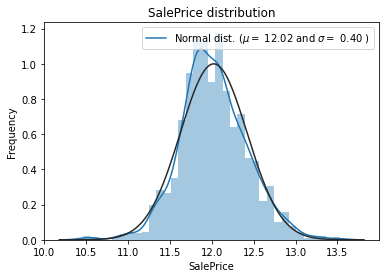

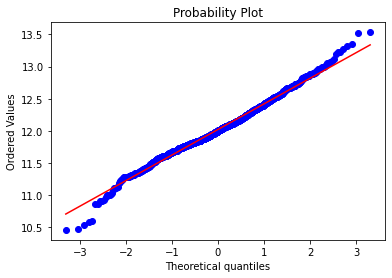

In [4]:
yy=df['SalePrice']

sns.distplot(yy , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(yy)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(yy, plot=plt)
plt.show()

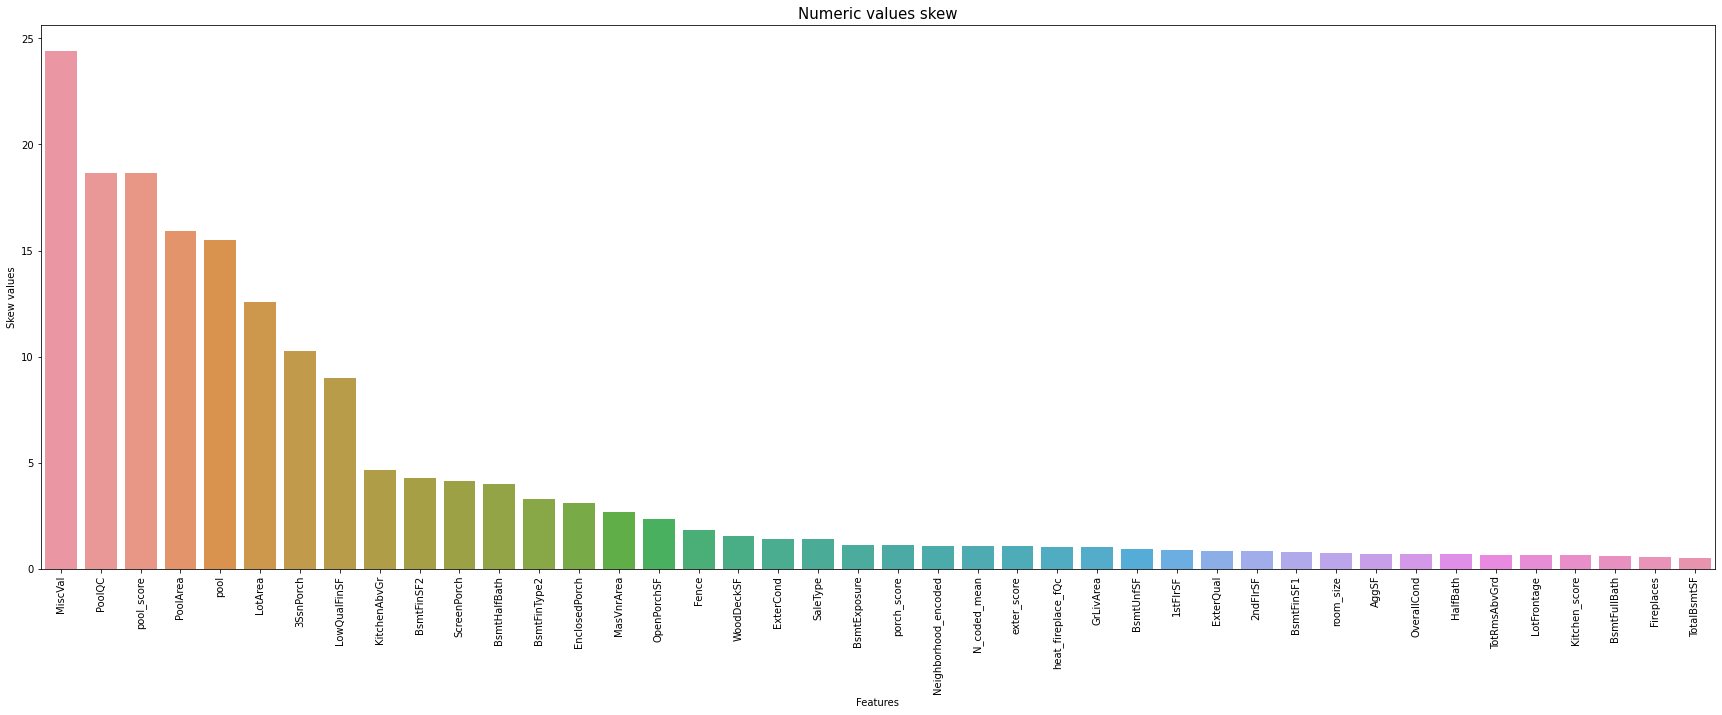

In [5]:
numeric_type= ['int64','float64']
numeric_skew= pd.DataFrame()
numerical_columns = ['Name','Skew']
data=[]
skewed_names= []

for col in df.columns:
    if df[col].dtypes in numeric_type:
        if (df[col].skew())>0.5:
            skewed_names.append(col)
            values= [col,df[col].skew()]
            temp_dic= zip(numerical_columns,values)
            data.append(dict(temp_dic))
            
numeric_skew = numeric_skew.append(data, ignore_index=False)
numeric_skew = numeric_skew.sort_values(by='Skew',ascending=False)
numeric_skew


plt.figure (figsize=(30,10))

draw= sns.barplot (x=numeric_skew['Name'],  y=numeric_skew['Skew'])
draw.axes.set_title ("Numeric values skew", fontsize=15)
draw.set_xlabel("Features", fontsize=10)
draw.set_ylabel("Skew values", fontsize=10)
draw.tick_params(axis= 'x', labelsize=10, rotation=90)
draw.tick_params(axis='y', labelsize=10)


N_Skewed= df[skewed_names].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = N_Skewed[N_Skewed>0.5]


In [6]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

skew_index = high_skew.index


for i in skew_index:
    df[i]= boxcox1p (df[i], boxcox_normmax(df[i]+1))
    
normalized_values = pd.DataFrame({'Skew':df[skew_index].skew()}).sort_values(by='Skew', ascending = False)

C:\Users\EngMA\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\EngMA\anaconda3\lib\site-packages\scipy\stats\stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


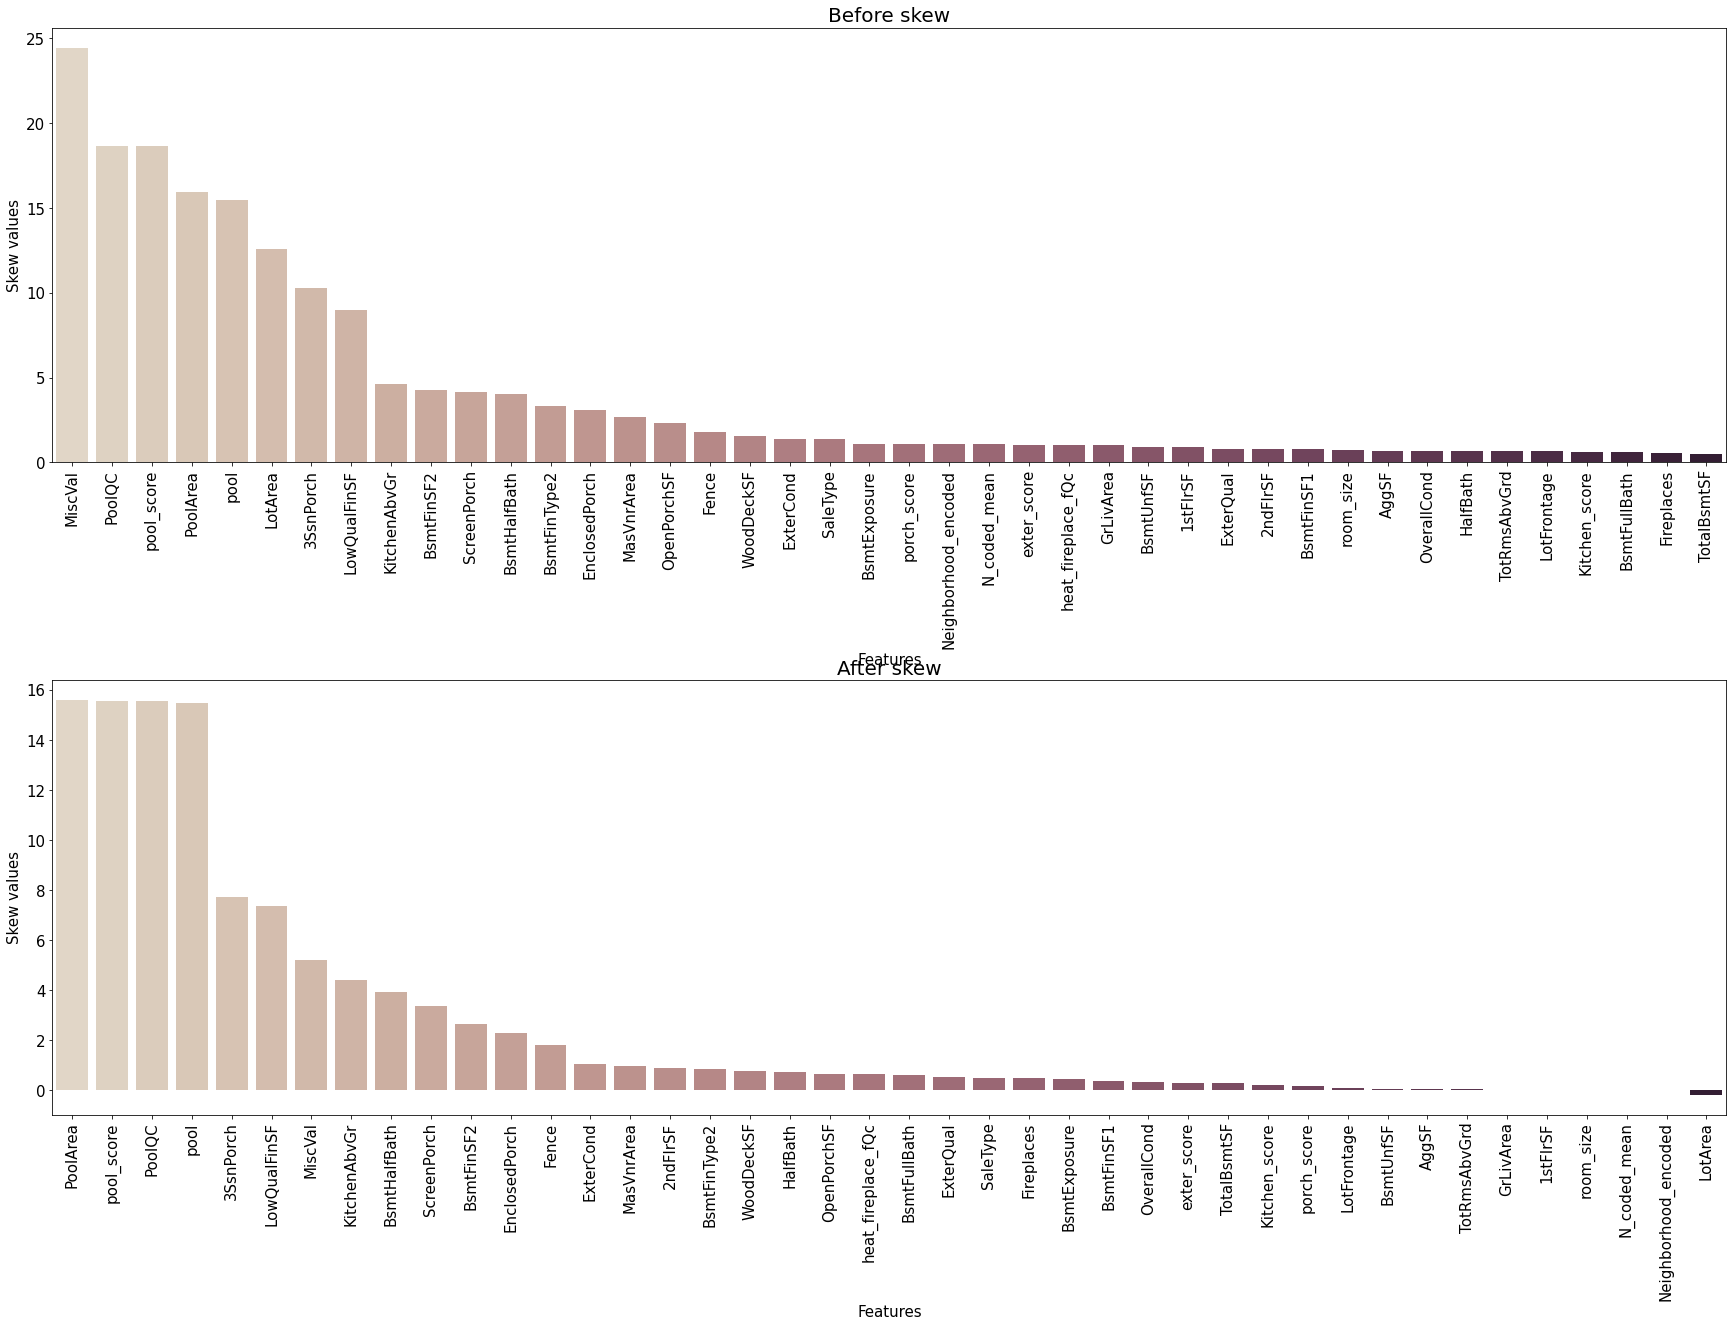

In [7]:
f ,(ax1,ax2)= plt.subplots (2,1,figsize=(30,20))

plt.subplots_adjust(hspace=0.5)


a= sns.barplot (x=numeric_skew['Name'],  y=numeric_skew['Skew'], palette="ch:.25", ax= ax1)
a.axes.set_title ("Before skew", fontsize=20)
a.set_xlabel("Features", fontsize=15)
a.set_ylabel("Skew values", fontsize=15)
a.tick_params(axis= 'x', labelsize=15, rotation=90)
a.tick_params(axis='y', labelsize=15)



b= sns.barplot (x=normalized_values.index,  y=normalized_values.Skew, palette="ch:.25", ax= ax2)
b.axes.set_title ("After skew", fontsize=20)
b.set_xlabel("Features", fontsize=15)
b.set_ylabel("Skew values", fontsize=15)
b.tick_params(axis= 'x', labelsize=15, rotation=90)
b.tick_params(axis='y', labelsize=15)

In [13]:
X_O = df.drop("SalePrice", axis=1)
# X = df[important_index]






# y = np.log1p(df["SalePrice"])
y = df["SalePrice"]



#use get dummies for the object class columns

X=pd.get_dummies(X_O).reset_index(drop=True)


X=X[list_important]
# X= X[['MasVnrType_BrkFace', 'BsmtCond', 'Exterior1st_Wd Sdng', 
#  'YrGroup', 'BedroomAbvGr', 'Neighborhood_Edwards', 
#  'Kitchen_score', 'GarageType', 'HouseStyle_2Story', 'LowQualFinSF',
#  'Exterior1st_HdBoard', 'BsmtFinSF2', 'YrSold', 'MiscVal', 'Neighborhood_Mitchel', 
#  'Neighborhood_NWAmes', 'Condition1_Artery', 'Fence', 'BsmtUnfSF', 'LotConfig_Inside', 
#  'MoSold', 'years_model', 'Neighborhood_CollgCr', 'GarageArea', 'GarageYrBlt', 'BsmtFinSF1', 
#  'TotalBsmtSF', 'porch_score', '2ndFlrSF', 'YearRemodAdd', 'BsmtQual', 'HalfBath', 'WoodDeckSF',
#  'OpenPorchSF', 'LotFrontage', 'FireplaceQu', 'MasVnrArea', 'MasVnrType_Stone', 'MSSubClass', 'EnclosedPorch',
#  '3SsnPorch', 'PoolArea', 'YearBuilt', 'BsmtFinType1', 'ScreenPorch', 'RoofStyle_Hip', 'heat_fireplace_fQc', 
#  'BldgType_1Fam', 'garage_score', 'bath_score', 'BsmtFullBath', 'Exterior1st_MetalSd', 'HeatingQC', 'overall_score',
#  'GarageCars', 'SaleType', 'OverallQual', 'LotConfig_CulDSac', 'Foundation_PConc', 'BsmtExposure', 'KitchenQual',
#  'SaleCondition', 'AggSF', 'Neighborhood_NridgHt', 'Functional', 'CentralAir', 'MSZoning', 'Exterior1st_BrkFace',
#  'Condition1_Norm', 'Neighborhood_StoneBr', 'Neighborhood_BrkSide', 'LotArea', 'Neighborhood_Crawfor']]

print(X.info())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_before_log, test_size=0.25, random_state=42)




# X_train=X_train[['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 
#  'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 
#  'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 
#  'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']]

# X_test=X_test[['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 
#  'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 
#  'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 
#  'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']]

# cols=['N_coded_mean', 'bath_score', 'GarageCars', 'KitchenQual', '1stFlrSF', 
#  'overall_score', 'room_size', 'heat_fireplace_fQc', 'Foundation_PConc', 
#  'MSSubClass', 'BsmtQual', 'YrGroup', 'MSZoning', 'LotArea', 'BsmtExposure', 
#  'CentralAir', 'BsmtFinType1', 'HalfBath', 'MasVnrType_Stone', 'SaleType']


# ss = StandardScaler()
# scaled_X_train = ss.fit_transform(X_train)
# scaled_X_test = ss.transform(X_test)
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 180 entries, Condition2_Norm to Neighborhood_Crawfor
dtypes: float64(35), int64(25), uint8(120)
memory usage: 850.9 KB
None


,Condition2_Norm,Condition2_Artery,Condition1_RRNn,Condition1_RRNe,Condition2_PosA,Condition2_Feedr,Condition1_PosA,Condition1_RRAe,Neighborhood_NAmes,Neighborhood_NPkVill,...,Neighborhood_NridgHt,Functional,CentralAir,MSZoning,Exterior1st_BrkFace,Condition1_Norm,Neighborhood_StoneBr,Neighborhood_BrkSide,LotArea,Neighborhood_Crawfor
0,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,1,0,0,8.912853,0
1,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,0,0,0,9.036782,0
2,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,1,0,0,9.190760,0
3,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,1,0,0,9.031711,1
4,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,1,0,0,9.420793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,1,0,0,8.849553,0
1448,1,0,0,0,0,0,0,0,0,0,...,0,6,1,4,0,1,0,0,9.344030,0
1449,1,0,0,0,0,0,0,0,0,0,...,0,7,1,4,0,1,0,0,8.978627,1
1450,1,0,0,0,0,0,0,0,1,0,...,0,7,1,4,0,1,0,0,9.048545,0


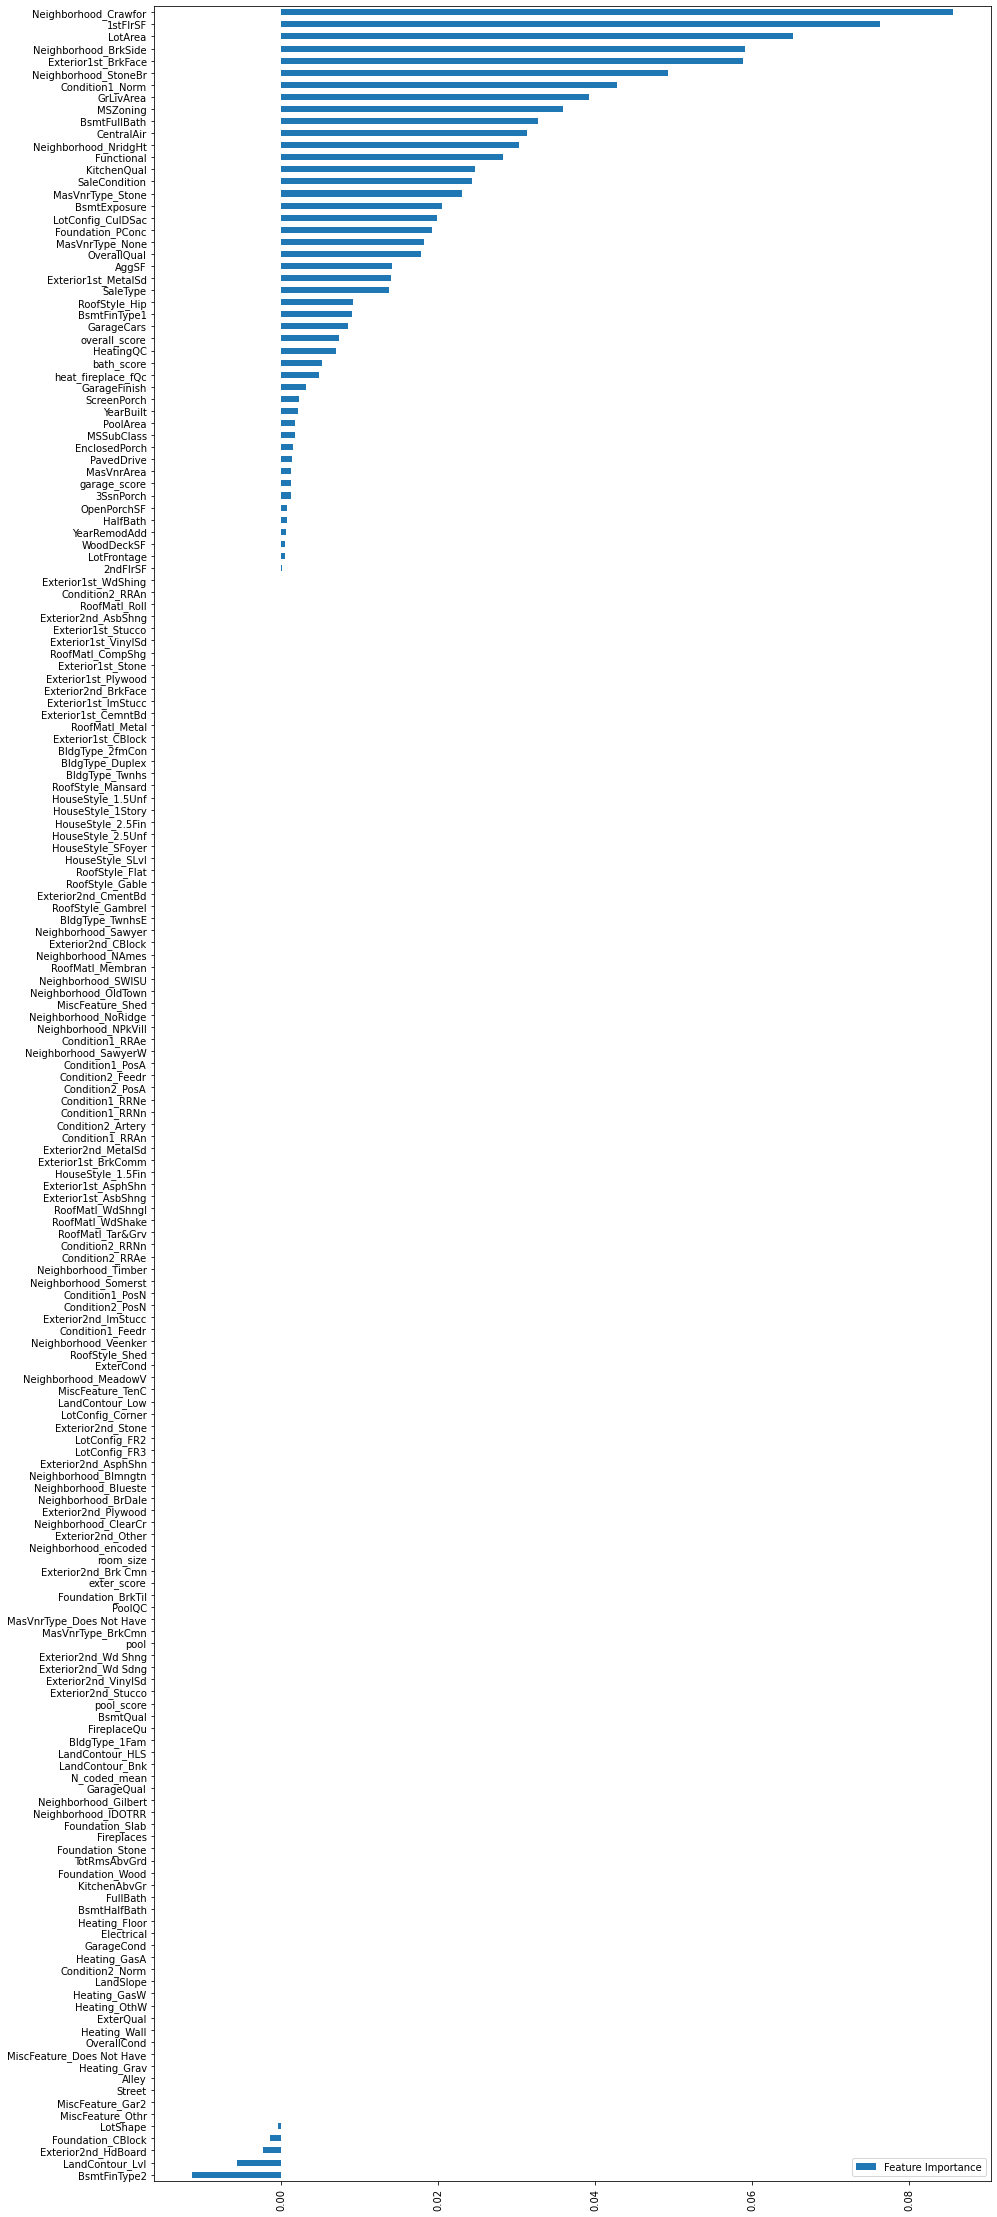

['MiscFeature_Othr', 'MiscFeature_Gar2', 'Street', 'Alley', 'Heating_Grav', 'MiscFeature_Does Not Have', 'OverallCond', 'Heating_Wall', 'ExterQual', 'Heating_OthW', 'Heating_GasW', 'LandSlope', 'Condition2_Norm', 'Heating_GasA', 'GarageCond', 'Electrical', 'Heating_Floor', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr', 'Foundation_Wood', 'TotRmsAbvGrd', 'Foundation_Stone', 'Fireplaces', 'Foundation_Slab', 'Neighborhood_IDOTRR', 'Neighborhood_Gilbert', 'GarageQual', 'N_coded_mean', 'LandContour_Bnk', 'LandContour_HLS', 'BldgType_1Fam', 'FireplaceQu', 'BsmtQual', 'pool_score', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'pool', 'MasVnrType_BrkCmn', 'MasVnrType_Does Not Have', 'PoolQC', 'Foundation_BrkTil', 'exter_score', 'Exterior2nd_Brk Cmn', 'room_size', 'Neighborhood_encoded', 'Exterior2nd_Other', 'Neighborhood_ClearCr', 'Exterior2nd_Plywood', 'Neighborhood_BrDale', 'Neighborhood_Blueste', 'Neighborhood_Blmngtn', 'Exterior2nd_AsphShn', 'LotC

In [14]:

lasso=Lasso(alpha=0.001)
lasso.fit(X,y)


FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

# FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,40))
FI_lasso.sort_values("Feature Importance").plot(kind="barh",figsize=(15,40))
plt.xticks(rotation=90)
plt.show()


# print(FI_lasso["Feature Importance"].keys())

# # print(FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance"))

# ordered_FI= FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance")
ordered_FI= FI_lasso.sort_values("Feature Importance")
# print(ordered_FI["Feature Importance"].keys())
list_important=[]
for k,v in ordered_FI["Feature Importance"].iteritems():
    if v>=0:
        list_important.append(k)
print(list_important)


In [15]:
#After log the SalePrice
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, random_state=42, shuffle=True).get_n_splits(X_train.values)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def rmse_cv_test(model):
    model.fit(X_train,y_train)
    rmse= np.sqrt(mean_squared_error(model.predict(X_test), y_test))
    return(rmse)

In [16]:
# #Before log the SalePrice
# from sklearn.model_selection import KFold, cross_val_score

# kf = KFold(n_splits=5, random_state=42, shuffle=True).get_n_splits(X_train_b.values)
# def rmse_cv_train_b(model):
#     rmse= np.sqrt(-cross_val_score(model, X_train_b, y_train_b, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)
# def rmse_cv_test_b(model):
#     model.fit(X_train_b,y_train_b)
#     rmse= np.sqrt(mean_squared_error(model.predict(X_test_b), y_test_b))
#     return(rmse)

In [17]:
#Linear Regression

lr_rg= LinearRegression()
#After log
score_lr_train= rmse_cv_train(lr_rg).mean()
score_lr_test = rmse_cv_test(lr_rg)
#Before log
# score_lr_train_b= rmse_cv_train_b(lr_rg).mean()
# score_lr_test_b = rmse_cv_test_b(lr_rg)

print("Linear Regression :   for train", str(score_lr_train)+ ', for test : '+str(score_lr_test))
# print("Linear Regression_b :   for train", str(score_lr_train_b)+ ', for test : '+str(score_lr_test_b))

Linear Regression :   for train 0.11754539732852445, for test : 0.12783465594829438


In [18]:
#SVR
from sklearn.pipeline import make_pipeline # transforming steps pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler 

svr_reg = make_pipeline(RobustScaler(), SVR(
    C= 20, epsilon= 0.008, gamma=0.0003))

#After log
svr_score_train = rmse_cv_train(svr_reg).mean()
svr_score_test = rmse_cv_test(svr_reg)
#Before log
# svr_score_train_b = rmse_cv_train_b(svr_reg).mean()
# svr_score_test_b = rmse_cv_test_b(svr_reg)

print("SVR :   for train", str(svr_score_train)+ ', for test : '+str(svr_score_test))
# print("SVR_b :   for train", str(svr_score_train_b)+ ', for test : '+str(svr_score_test_b))

SVR :   for train 0.11926933439864121, for test : 0.12423316722781905


In [19]:
#Ridge

alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,4,5, 6, 10, 30, 60]


ridge_reg = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas, cv=kf))


#After log
ridge_score_train = rmse_cv_train(ridge_reg).mean()
ridge_score_test = rmse_cv_test(ridge_reg)

#Before log
# ridge_score_train_b = rmse_cv_train_b(ridge_reg).mean()
# ridge_score_test_b = rmse_cv_test_b(ridge_reg)

print("Ridge: for train", str(ridge_score_train)+ ', for test : '+str(ridge_score_test))
# print("Ridge_b: for train", str(ridge_score_train_b)+ ', for test : '+str(ridge_score_test_b))

Ridge: for train 0.11209644241901348, for test : 0.12051987479136579


In [20]:
#Lasso

lasso_reg = make_pipeline(RobustScaler(), LassoCV(alphas=np.arange(0.0001,0.1,0.0001),max_iter = 50000, cv=kf))

#After log

lasso_score_train = rmse_cv_train(lasso_reg).mean()
lasso_score_test = rmse_cv_test(lasso_reg)


#Before log
# lasso_score_train_b = rmse_cv_train_b(lasso_reg).mean()
# lasso_score_test_b = rmse_cv_test_b(lasso_reg)

print("Lasso: for train", str(lasso_score_train)+ ', for test : '+str(lasso_score_test))

# print("Lasso_b: for train", str(lasso_score_train_b)+ ', for test : '+str(lasso_score_test_b))

Lasso: for train 0.1116153782866495, for test : 0.11860333752465742


In [21]:
#Elestic Net

elnet_reg = make_pipeline(RobustScaler(),ElasticNetCV(
    l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8,0.85, 0.9, 0.95, 1],
    alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                     0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
    max_iter = 50000, cv = kf))

#After log
score_elnet_train = rmse_cv_train(elnet_reg).mean()
score_elnet_test = rmse_cv_test(elnet_reg)


#before log
# score_elnet_train_b = rmse_cv_train_b(elnet_reg).mean()
# score_elnet_test_b = rmse_cv_test_b(elnet_reg)


print("Elastic Net: for train", str(score_elnet_train)+ ', for test : '+str(score_elnet_test))
# print("Elastic Net_b: for train", str(score_elnet_train_b)+ ', for test : '+str(score_elnet_test_b))

Elastic Net: for train 0.11173267973539547, for test : 0.1185047672644909


In [22]:
#XGBOOST
import xgboost

xgb_reg = xgboost.XGBRegressor(
        colsample_bytree=0.4580, gamma=0.05, reg_alpha=0.5, reg_lambda=0.8,
        subsample=0.55,learning_rate=0.07, max_depth=3, 
        min_child_weight=1.6, n_estimators=3000,random_state =7,
        nthread = -1)

#After log
score_xgb_train = rmse_cv_train(xgb_reg).mean()
score_xgb_test = rmse_cv_test(xgb_reg)

#before log
# score_xgb_train_b = rmse_cv_train_b(xgb_reg).mean()
# score_xgb_test_b = rmse_cv_test_b(xgb_reg)


print("XGBoost: for train", str(score_xgb_train)+ ', for test : '+str(score_xgb_test))
# print("XGBoost_b: for train", str(score_xgb_train_b)+ ', for test : '+str(score_xgb_test_b))

XGBoost: for train 0.12235671996152683, for test : 0.11923747048354359


In [23]:
#LightGBM
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(objective='regression',num_leaves=6,
            feature_fraction_seed=9, bagging_seed=9,learning_rate=0.05,
            n_estimators=790,bagging_fraction = 0.9,max_bin = 52,
            feature_fraction = 0.2340, bagging_freq = 5,min_data_in_leaf =7,
             min_sum_hessian_in_leaf = 12)


#After log
score_lgbm_train= rmse_cv_train(lgbm_reg).mean()
score_lgbm_test= rmse_cv_test(lgbm_reg)


#Before log
# score_lgbm_train_b= rmse_cv_train_b(lgbm_reg).mean()
# score_lgbm_test_b= rmse_cv_test_b(lgbm_reg)

print("LightGBM: for train", str(score_lgbm_train)+ ', for test : '+str(score_lgbm_test))
# print("LightGBM_b: for train", str(score_lgbm_train_b)+ ', for test : '+str(score_lgbm_test_b))

[LightGBM] [Warning] feature_fraction is set=0.234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.234
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=12, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=12
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.234
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=12, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=12
[Li

In [24]:
#GRADIENT BOOST REGRESSOR

gbr_reg = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


#After log
score_gbr_train= rmse_cv_train(gbr_reg).mean()
score_gbr_test= rmse_cv_test(gbr_reg)


#Before log
# score_gbr_train_b= rmse_cv_train_b(gbr_reg).mean()
# score_gbr_test_b= rmse_cv_test_b(gbr_reg)

print("GBR: for train", str(score_gbr_train)+ ', for test : '+str(score_gbr_test))
# print("GBR_b: for train", str(score_gbr_train_b)+ ', for test : '+str(score_gbr_test_b))

GBR: for train 0.12052831805295827, for test : 0.12387902257560383


In [25]:
regressor_df = pd.DataFrame({
                    'Regressor' : ['Linear Regression','SVR','Ridge',
'Lasso','Elastic Net','XGBoost','LightGBM','Gradient Boost Regressor'],
                     'RMSLE_train' :[ score_lr_train, svr_score_train, ridge_score_train,
 lasso_score_train, score_elnet_train, score_xgb_train, score_lgbm_train,score_gbr_train],
                    'RMSLE_test':[score_lr_test,svr_score_test,
ridge_score_test,lasso_score_test,score_elnet_test,
score_xgb_test,score_lgbm_test,score_gbr_test]} )

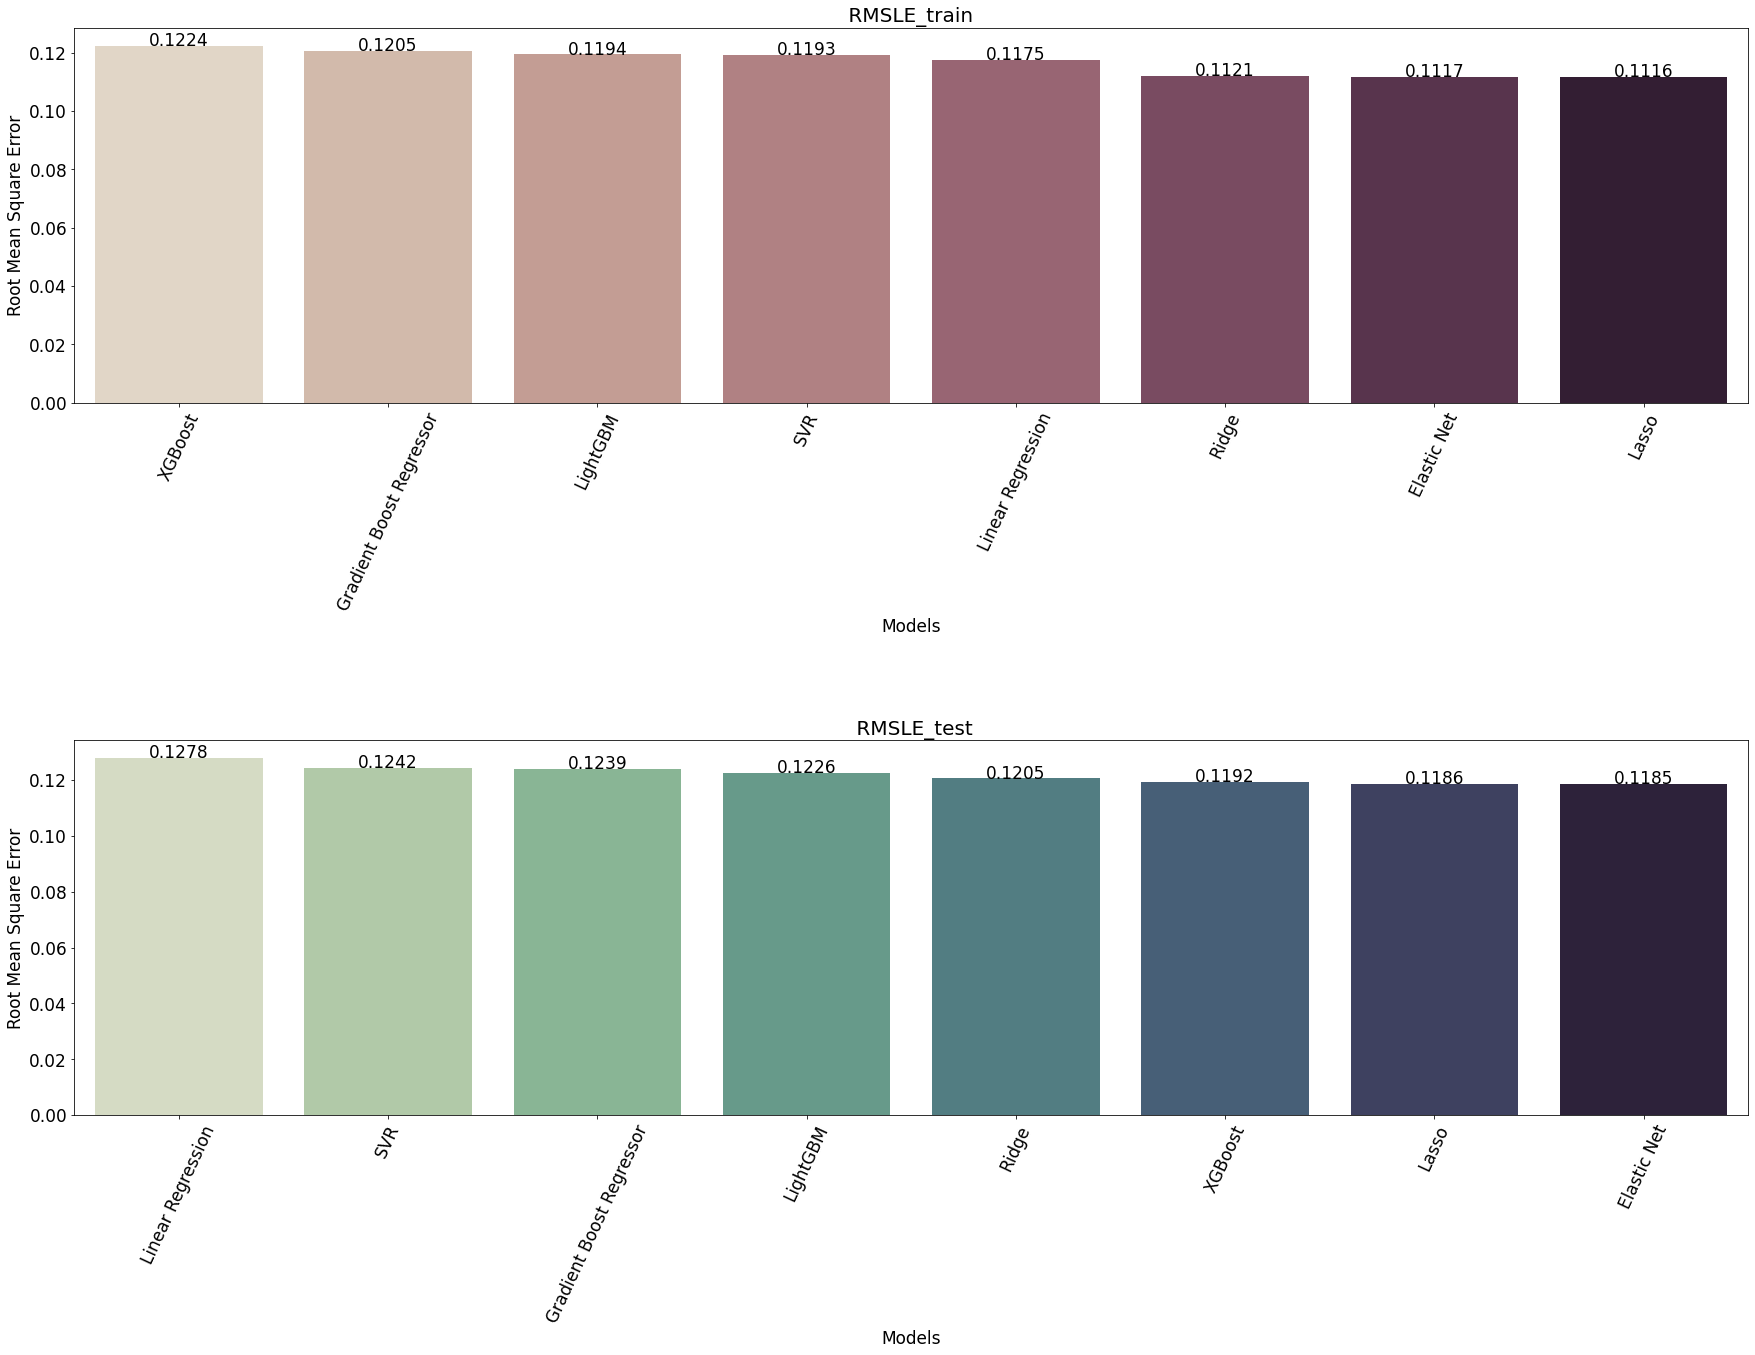

In [26]:
pal = sns.cubehelix_palette(8, start=.5, rot=-.75)
f ,(ax1,ax2)= plt.subplots(2,1,figsize=(30,20) )
plt.subplots_adjust( hspace = 0.9  )

regressor_df = regressor_df.sort_values(by='RMSLE_test', ascending = False)

c = sns.barplot(x = regressor_df['Regressor'],
                y=regressor_df['RMSLE_test'],palette=pal,ax=ax2)
c.axes.set_title(" RMSLE_test",fontsize=20)
c.set_xlabel("Models",fontsize=17)
c.set_ylabel("Root Mean Square Error",fontsize=17)
c.tick_params(axis = 'x',labelsize=17,rotation=65)
c.tick_params(axis = 'y',labelsize=17)

regressor_values=regressor_df['RMSLE_test'].values
for i,index in enumerate(regressor_values):
    c.text(i,index, round(index,4), color='black', ha="center",fontsize=17)

regressor_df = regressor_df.sort_values(by='RMSLE_train', ascending = False)
    
b = sns.barplot(x = regressor_df['Regressor'],
                y=regressor_df['RMSLE_train'],palette="ch:.25", ax=ax1)
b.axes.set_title(" RMSLE_train ",fontsize=20)
b.set_xlabel("Models",fontsize=17)
b.set_ylabel("Root Mean Square Error",fontsize=17)
b.tick_params(axis = 'x',labelsize=17,rotation=65)
b.tick_params(axis = 'y',labelsize=17)

regressor_values=regressor_df['RMSLE_train'].values
for i,index in enumerate(regressor_values):
    b.text(i,index, round(index,4), color='black', ha="center",fontsize=17)

In [27]:


lr_rg_stack= lr_rg
svr_reg_stack=svr_reg
ridge_reg_stack=ridge_reg
lasso_reg_stack=lasso_reg
elnet_reg_stack=elnet_reg
xgb_reg_stack =xgb_reg 
lgbm_reg_stack=lgbm_reg
gbr_reg_stack=gbr_reg



lr_rg_stack.fit(X_train,y_train)
svr_reg_stack.fit(X_train,y_train)
ridge_reg_stack.fit(X_train,y_train)
lasso_reg_stack.fit(X_train,y_train)
elnet_reg_stack.fit(X_train,y_train)
xgb_reg_stack.fit(X_train,y_train)
lgbm_reg_stack.fit(X_train,y_train)
gbr_reg_stack.fit(X_train,y_train)


[LightGBM] [Warning] feature_fraction is set=0.234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.234
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=12, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=12
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [28]:
# 0.3,0.3,0.15,0.1,0.05,0.05,0.025,0.025

def blended_predictions(X_test):
    return (((0.3* elnet_reg_stack.predict(X_test))+ 0.3 * lasso_reg_stack.predict(X_test)) +\
            (0.15 * ridge_reg_stack.predict(X_test)) + (0.1 * xgb_reg_stack.predict(X_test)) + \
            (0.075 * lgbm_reg_stack.predict(X_test)) + (0.075 * gbr_reg_stack.predict(X_test)))#+\
#              (0.025 * svr_reg_stack.predict(X_test)) + (0.025 * lr_rg_stack.predict(X_test)))
y_pred_blended = np.expm1(blended_predictions(X_test))

y_pred_blended_log = blended_predictions(X_test)
stacked_model_mse= np.sqrt(mean_squared_error(y_pred_blended, y_test_b))

stacked_model_mse_log= np.sqrt(mean_squared_error(y_pred_blended_log , y_test))

print("Stacked:  for test : ", stacked_model_mse, "With log",stacked_model_mse_log)

Stacked:  for test :  20089.40584953563 With log 0.1160157095931743


In [29]:
from sklearn.ensemble import VotingRegressor
# We need the unfitted models...
vot_reg = VotingRegressor([('elnet', elnet_reg_stack),('lss', lasso_reg_stack),
                      ('rdg', ridge_reg_stack),('xgb', xgb_reg_stack),
                      ('lgbm', lgbm_reg_stack), ('gbr', gbr_reg_stack)])
#                           ('svr', svr_reg_stack), ('lr', lr_rg_stack)]                         )

vot_reg.fit(X_train,y_train)
score_voting_test= rmse_cv_test(vot_reg)

print("Voting regressor: "+ str(score_voting_test))


[LightGBM] [Warning] feature_fraction is set=0.234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.234
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=12, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=12
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Voting regressor: 0.11538334878675786


In [ ]:
#ideas

# Change nominal to ordinal

# Add more features Engineer

# get a table for actual and predicted values for SalePrice with the difference between them in term of mse

